In [107]:
#libraries
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
plt.style.use('fivethirtyeight')


In [108]:
#getting dataset
df = yf.download('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')

[*********************100%***********************]  1 of 1 completed


In [ ]:
!pip install yfinance
!pip install yahoofinancials


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575913,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643498,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783870,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917509,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897021,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,66.053421,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.616837,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.786598,137310400


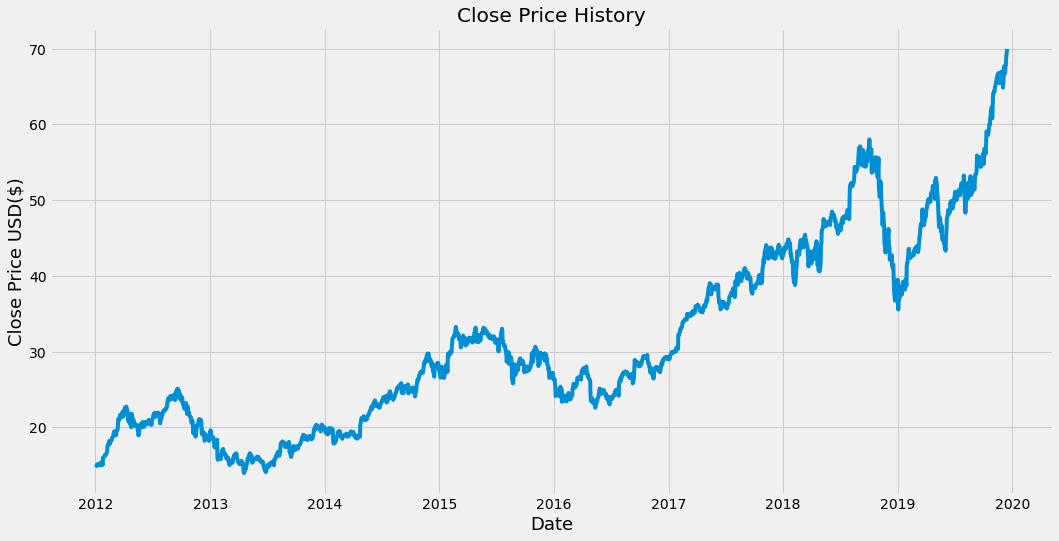

In [109]:
#visualising closing figure trend
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [110]:
df.shape

(2002, 6)

In [111]:
#filter closing column
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data


array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [112]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [113]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(1542, 60)

In [114]:
  x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
  x_train.shape

(1542, 60, 1)

In [115]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [116]:
#copile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [117]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1542/1542 [==============================] - 49s 28ms/step - loss: 8.7432e-04


In [118]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [119]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [120]:
x_test.shape

(400, 60, 1)

In [121]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [122]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

1.6694548026989606

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


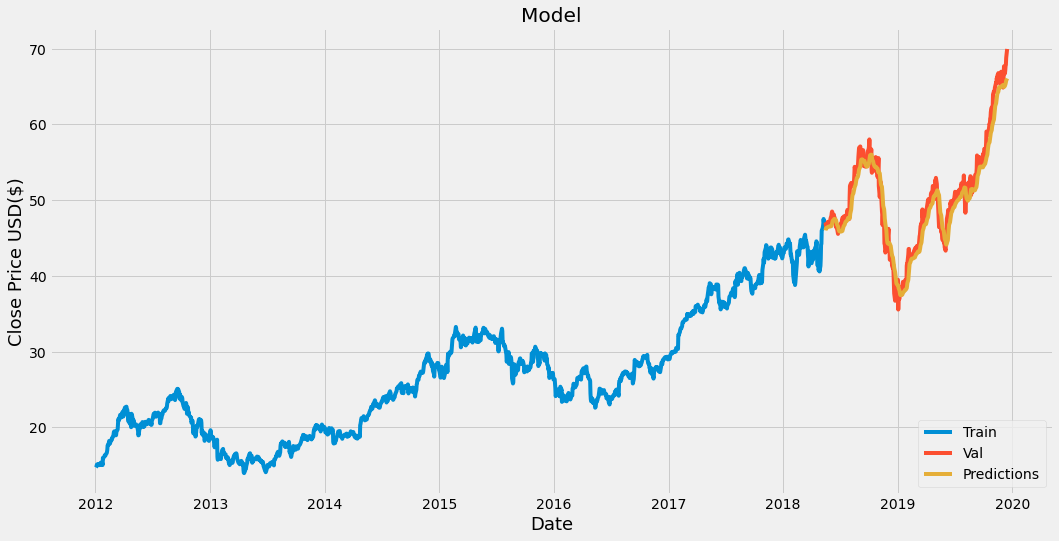

In [126]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [127]:
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,46.000515
2018-05-17,46.747501,46.201126
2018-05-18,46.577499,46.320435
2018-05-21,46.907501,46.368546
2018-05-22,46.790001,46.405846
...,...,...
2019-12-10,67.120003,65.210922
2019-12-11,67.692497,65.357559
2019-12-12,67.864998,65.554588


In [128]:

  #Get the quote

apple_quote=yf.download('AAPL',data_source='yahoo',start='2019-12-10',end='2019-12-10')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data to a numpy array
X_test=np.array(X_test)
#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: No data found for this date range, symbol may be delisted


ValueError: ignored